In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('wine_quality.csv')

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

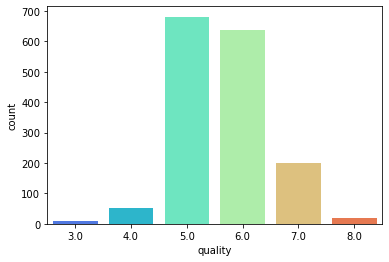

In [6]:
sns.countplot(x=dataset['quality'],palette='rainbow')

In [7]:
dataset.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [8]:
dataset.drop(['residual sugar'],axis=1, inplace = True)

In [9]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


<AxesSubplot:>

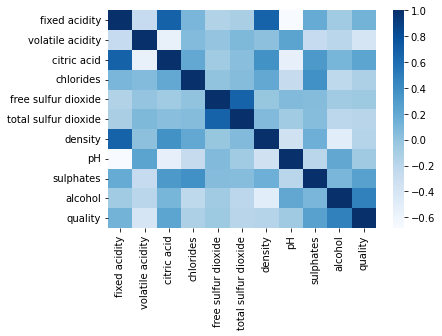

In [10]:
sns.heatmap(dataset.corr(),cmap='Blues')

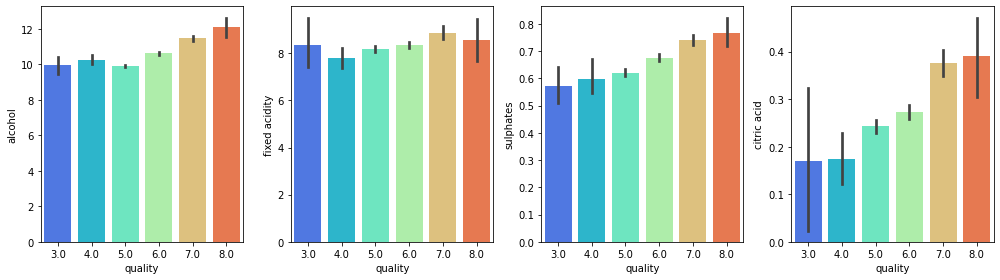

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
sns.barplot(x = 'quality', y = 'alcohol', data = dataset,palette='rainbow')
plt.subplot(1,4,2)
sns.barplot(x = 'quality', y = 'fixed acidity', data = dataset,palette='rainbow')
plt.tight_layout()
plt.subplot(1,4,3)
sns.barplot(x = 'quality', y = 'sulphates', data = dataset,palette='rainbow')
plt.tight_layout()
plt.subplot(1,4,4)
sns.barplot(x = 'quality', y = 'citric acid', data = dataset,palette='rainbow')
plt.tight_layout()

In [12]:
dataset['quality']=[1 if i >6.5 else 0 for i in dataset['quality']]
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

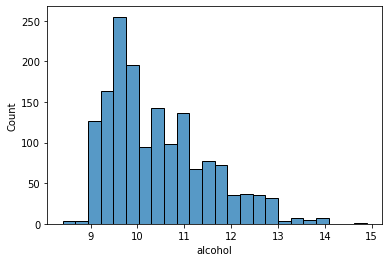

In [13]:
sns.histplot(dataset['alcohol'])

<AxesSubplot:xlabel='chlorides'>

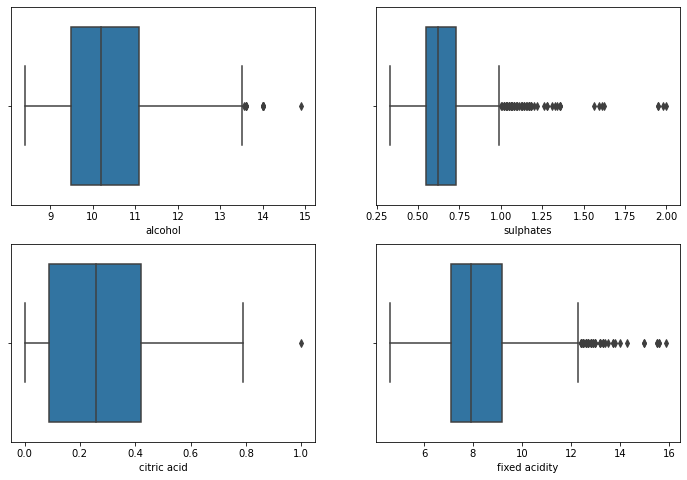

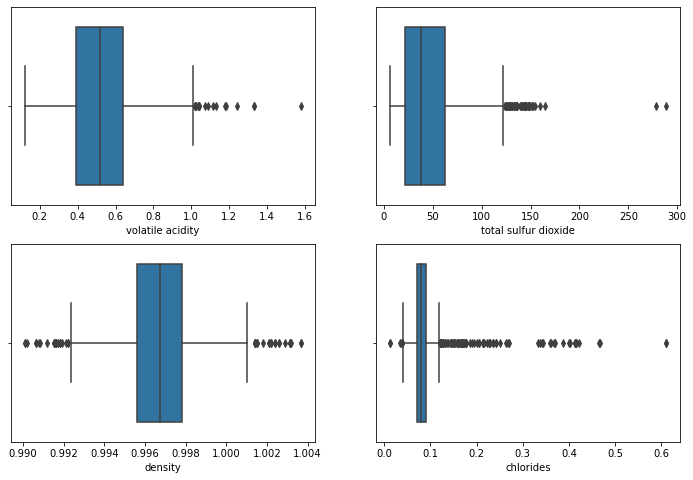

In [14]:
#using boxplot for given catagorical variables

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=dataset['alcohol'])
plt.subplot(2,2,2)
sns.boxplot(x=dataset['sulphates'])
plt.subplot(2,2,3)
sns.boxplot(x=dataset['citric acid'])
plt.subplot(2,2,4)
sns.boxplot(x=dataset['fixed acidity'])
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=dataset['volatile acidity'])
plt.subplot(2,2,2)
sns.boxplot(x=dataset['total sulfur dioxide'])
plt.subplot(2,2,3)
sns.boxplot(x=dataset['density'])
plt.subplot(2,2,4)
sns.boxplot(x=dataset['chlorides'])

In [15]:
dataset['zscore']=((dataset['citric acid']-dataset['citric acid'].mean())/dataset['citric acid'].std())
filt=np.abs(dataset['zscore'])<3
dataset=dataset[filt]

In [16]:
dataset['zscore2']=((dataset['alcohol']-dataset['alcohol'].mean())/dataset['alcohol'].std())
filt=np.abs(dataset['zscore2'])<3
dataset=dataset[filt]

In [17]:
dataset['zscore3']=((dataset['total sulfur dioxide']-dataset['total sulfur dioxide'].mean())/dataset['total sulfur dioxide'].std())
filt=np.abs(dataset['zscore3'])<3
dataset=dataset[filt]

In [18]:
# X is independant variable and  y is Dependant or Target variable

X=dataset.drop(['quality','zscore','zscore2','free sulfur dioxide','zscore3'],axis=1,inplace = False)
y=dataset['quality']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=42)
     

from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x_train=scaling.fit_transform(X_train)
x_test=scaling.fit_transform(X_test)

In [20]:
# Now we will be using Different ML Algorithms to find out which is giving us best Accuracy
     

from sklearn.linear_model import LogisticRegression
     

model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test) #measuring the accuracy of the model against the training data (R^2 method)
     

0.873015873015873

In [22]:
from sklearn import tree
     

model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8761904761904762

In [22]:
from sklearn.svm import SVC
     

model=SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8920634920634921

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
for i in range(1,60):
    model=KNeighborsClassifier( n_neighbors=i,metric='manhattan')
    model.fit(x_train,y_train)
    print(i+model.score(x_test,y_test))

1.873015873015873
2.8793650793650793
3.8603174603174604
4.882539682539683
5.87936507936508
6.885714285714286
7.895238095238096
8.895238095238096
9.885714285714286
10.892063492063492
11.882539682539683
12.882539682539683
13.87936507936508
14.882539682539683
15.873015873015873
16.876190476190477
17.873015873015873
18.876190476190477
19.876190476190477
20.882539682539683
21.882539682539683
22.882539682539683
23.87936507936508
24.87936507936508
25.866666666666667
26.873015873015873
27.866666666666667
28.876190476190477
29.86984126984127
30.873015873015873
31.86984126984127
32.86984126984127
33.86984126984127
34.86984126984127
35.87301587301587
36.87301587301587
37.86984126984127
38.87301587301587
39.87301587301587
40.87936507936508
41.87936507936508
42.87936507936508
43.87301587301587
44.87619047619047
45.87301587301587
46.87301587301587
47.86984126984127
48.87619047619047
49.87619047619047
50.87619047619047
51.87619047619047
52.87936507936508
53.87619047619047
54.87936507936508
55.8793650

In [25]:
# k=8

model=KNeighborsClassifier( n_neighbors=8,metric='manhattan')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8952380952380953

In [26]:
a=float(input("Enter value of 'fixed acidity': "))
b=float(input("Enter value of 'volatile acidity': "))
c=float(input("Enter value of 'citric acid': "))
d=float(input("Enter value of 'chlorides': "))
e=float(input("Enter value of 'total sulfur dioxide': "))
f=float(input("Enter value of 'density': "))
g=float(input("Enter value of 'pH': "))
h=float(input("Enter value of 'sulphates': "))
i=float(input("Enter value of 'alcohol': "))

Enter value of 'fixed acidity': 12.5
Enter value of 'volatile acidity': 7.0
Enter value of 'citric acid': 3.0
Enter value of 'chlorides': 6.78
Enter value of 'total sulfur dioxide': 6.8
Enter value of 'density': 9.0
Enter value of 'pH': 4.9
Enter value of 'sulphates': 2.8
Enter value of 'alcohol': 7.9


In [27]:
#Using k-nearest neighbors (KNN) algorithm with k=8

model=KNeighborsClassifier( n_neighbors=8,metric='manhattan')

model.fit(x_train,y_train)

test_list = [a,b,c,d,e,f,g,h,i]

test_df = pd.DataFrame(test_list)

test = test_df.transpose()

test_pred = model.predict(test)

if(test_pred == 0):

    print("Wine Quality Is Good.")

else:

    print("Wine Quality Is Not Good.")
     


Wine Quality Is Good.
